In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [29]:
def imgToGrid(img, line_color=(0, 255, 0), thickness=1, type_=cv2.LINE_AA, pxstep=10):
  '''(ndarray, 3-tuple, int, int) -> void
  draw gridlines on img
  line_color:
      BGR representation of colour
  thickness:
      line thickness
  type:
      8, 4 or cv2.LINE_AA
  pxstep:
      grid line frequency in pixels
  '''
  rows = []
  grid = []
  x = 0
  while x+pxstep <= img.shape[0]:
    rows.append(img[x:x+pxstep,:,:])
    # cv2.line(img, (x, 0), (x, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
    x += pxstep
  
  print(len(rows))
  for row in rows:
    y = 0
    while y+pxstep <= row.shape[1]:
      grid.append(row[:,y:y+pxstep,:])
      y += pxstep
  
  return(grid)


(720, 1038, 3)
2
(6, 300, 300, 3)


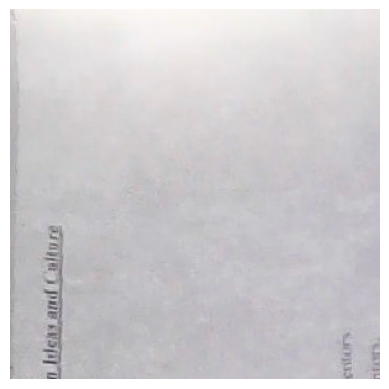

In [28]:
img = cv2.imread("images/referance.jpg", 1)
print(img.shape)
# plt.figure()
# plt.imshow(img)
# plt.axis('off')
# plt.show()
grid = np.array(imgToGrid(img))
print(grid.shape)
plt.figure()
plt.imshow(grid[0])
plt.axis('off')
plt.show()

(360, 519)
3


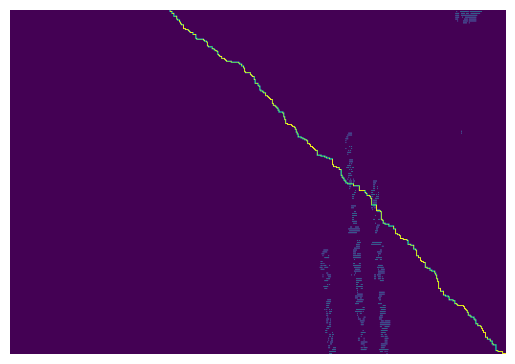

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110),

In [103]:
from astar.search import AStar

img = cv2.imread("images/referance.jpg", cv2.IMREAD_GRAYSCALE)
img.resize(int(720/2), int(1038/2))
print(img.shape)

img = np.where(img<112, 1, 0).astype(np.uint8)


path = AStar(img).search((0,0), (359, int(1038/2)-1))

for dot in path:
    img = cv2.circle(img, (dot[1], dot[0]), radius=0, color=(3), thickness=-1)
# print(np.where((img != 1) & (img != 0)))
print(img[int(720/2)-1, int(519)-1])
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()


print(path)